
#Predict Sales Revenue
While working with a very popular Advertising data set, we predict sales revenue based on advertising spending through mediums such as TV, radio, and newspaper.

#Task 1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

### Task 2: Loading the Data




---

In [2]:
advert=pd.read_csv('Advertising.csv')

print(advert.head())
print(advert.info())


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


### Task 3: Remove the index column

In [3]:
print(advert.columns)

advert.drop(['Unnamed: 0'],axis=1,inplace=True)

print(advert.head())


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


### Task 4: Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


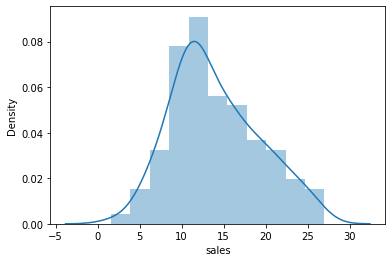

In [5]:
import seaborn as sns

sns.distplot(advert.sales)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


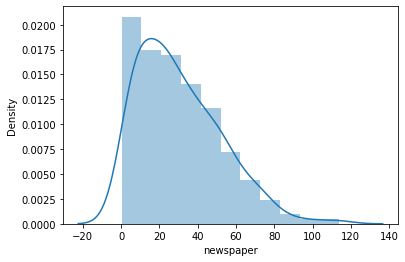

In [6]:
sns.distplot(advert.newspaper)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


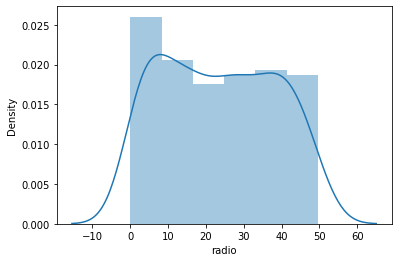

In [7]:
sns.distplot(advert.radio)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


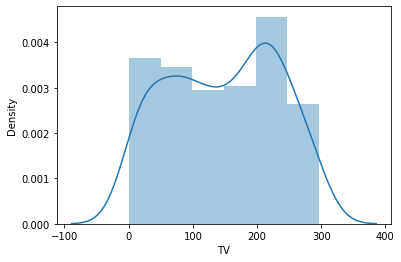

In [8]:
sns.distplot(advert.TV)

### Task 5: Exploring Relationships between Predictors and Response

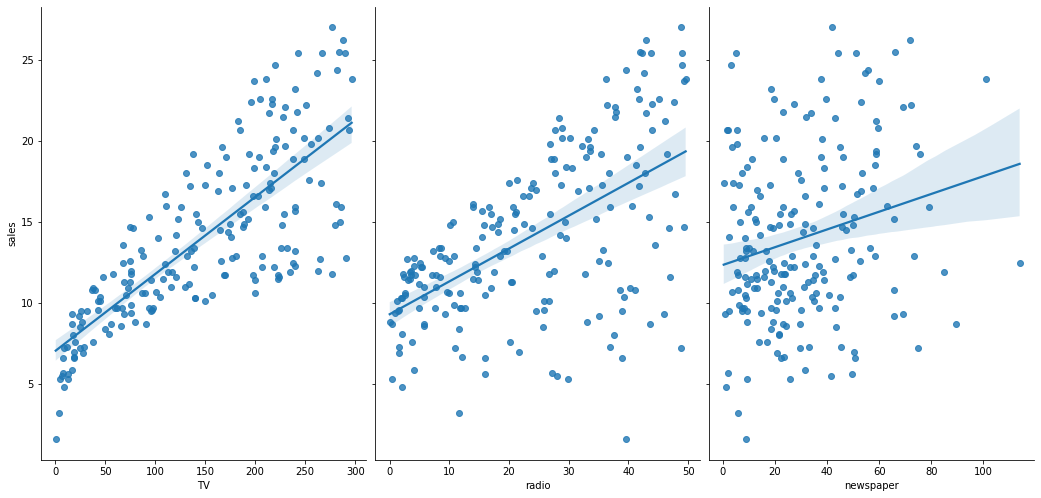

In [9]:
sns.pairplot(advert,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7,kind='reg')


0.7822244248616061
                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


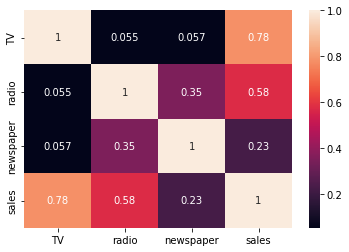

In [10]:
print(advert.TV.corr(advert.sales))

print(advert.corr())

sns.heatmap(advert.corr(),annot=True)
#we find thet the feaature tv is the best one to work with


### Task 6: Creating the Simple Linear Regression Model

In [11]:
x=advert[['TV']]
print(x.head())
print(type(x))
print(x.shape)


      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8
<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [12]:
y=advert.sales

print(type(y))
print(y.shape)


<class 'pandas.core.series.Series'>
(200,)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)


In [14]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(150, 1)
(50, 1)
(150,)
(150,)


In [15]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()


In [16]:
linreg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 7: Interpreting Model Coefficients

In [17]:
print(linreg.intercept_)


6.9119726188687185


In [18]:
print(linreg.coef_)


[0.04802945]


### Task 8: Making Predictions with our Model

In [19]:
y_pred=linreg.predict(x_test)
print(y_pred[:5])

[17.03658069 16.63793625 11.50839099 20.36982452 19.10184704]


### Task 9: Model Evaluation Metrics

In [20]:
true=[100,50,30,20]
pred=[90,50,50,30]

In [21]:
from sklearn import metrics


In [22]:
#mean absolute error
print(metrics.mean_absolute_error(true,pred)) 

10.0


In [23]:

#mean squared error
print(metrics.mean_squared_error(true,pred))

150.0


In [24]:
print(np.sqrt(metrics.mean_squared_error(true,pred)))


12.24744871391589


In [25]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


3.210929707703542
